# 데이터 전처리 (Data Preprocessing)
- ML의 모든 알고리즘은 데이터 기반. 어떤 데이터를 입력으로 가지느냐에 따라 결과도 달라진다.
- Null값 처리?
  - 해당 피처의 중요도가 높다면 피처의 평균으로 대체할 경우 왜곡이 심할 수 있다. 업무 로직등을 상세히검토해 더 정밀한 대체값을 선정해야 한다.
- 사이킷런의 머신러닝 알고리즘은 문자열값을 입력값으로 허용하지 않는다. => 문자형 값은 인코딩돼서 숫자형으로 변환되어야 한다.
- 불필요한 피처라면 삭제하는게 나을 수도 있다.

# 데이터 인코딩
- 레이블 인코딩 : Label Encoding
  - 카테고리 피처를 코드형 숫자값으로 변환
    - ex) 상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터 등 TV :1 , 냉장고 :2 전자레인지 :3, 컴퓨터 :4
- 원핫인코딩 : One Hot Encoding
  - 피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 컬럼에만 1을 표시하고, 나머지는 0을 표시하는 방식

- 빈도인코딩 : Frequency Encoding
- SVD 잠재 의미 분석하는 인코딩

## 1. 레이블 인코딩

In [1]:
from sklearn.preprocessing import LabelEncoder
items = ['TV','냉장고','전자레인지','노트북','선풍기','선풍기','믹서기','믹서기']

#LabelEncoder를 객체로 생성한 후, fit(), transform() 으로 레이블 인코딩 수행
encoder = LabelEncoder() # 생성
encoder.fit(items) # 학습
labels = encoder.transform(items)
print('인코딩 변환값',labels)


인코딩 변환값 [0 1 5 2 4 4 3 3]


In [3]:
# 데이터가 많은 경우
print('인코딩 클래스',encoder.classes_)
# 0부터 순서대로 인코딩 값에 대한 원본을 가지고 있다

인코딩 클래스 ['TV' '냉장고' '노트북' '믹서기' '선풍기' '전자레인지']


In [4]:
# 다시 디코딩 하는 법
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3,2,4,4,4,4,4,4]))

디코딩 원본값: ['선풍기' '전자레인지' '노트북' 'TV' '냉장고' '냉장고' '믹서기' '믹서기' '노트북' '선풍기' '선풍기' '선풍기'
 '선풍기' '선풍기' '선풍기']


### 주의할점
- 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환
- 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환되면서 몇몇 ML 알고리즘에서는 예측 성능이 떨어지는 경우 발생
  - ex) 1과 2차이가 정말 차이가 있는게 맞는건가?
  - 숫자 값에 따른 순서나 중요도로 인식될 수 있음. 이런 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용하지 않아야 함.
  - 트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩 사용시 문제 **없음**

## 2. 원-핫 인코딩
- 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식
- 해당 고유값에 매칭되는 피처만 1이 되고, 나머지는 0을 입력하며, 이러한 특성으로 원핫 (여러개의 속성 중 단 한개의 속성만 1로 표시)

In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']

# 2차원 ndarray로 변환
items =np.array(items).reshape(-1,1)

#원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


### pd.get_dummies(df)
- 판다스에서 지원하는 원핫인코딩 메서드

In [8]:
import pandas as pd
df_1 = pd.DataFrame({'이름':['홍길동','김영희','김철수','박철수','오철수','정철수','정철수','배철수']})
df_1

,이름
0,홍길동
1,김영희
2,김철수
3,박철수
4,오철수
5,정철수
6,정철수
7,배철수


In [9]:
# 원-핫 인코딩 바로 사용 가능
pd.get_dummies(df_1)

,이름_김영희,이름_김철수,이름_박철수,이름_배철수,이름_오철수,이름_정철수,이름_홍길동
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0


In [11]:
import seaborn as sns
df=sns.load_dataset('titanic')
df_sns = df[['sex','embarked','class']]
df_1= pd.get_dummies(df_sns)
df_1

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,1,0
887,1,0,0,0,1,1,0,0
888,1,0,0,0,1,0,0,1
889,0,1,1,0,0,1,0,0


In [13]:
pd.concat([df,df_1],axis=1) #깔끔한 하나의 숫자로 완성된 데이터프레임을 만들 수 있다!

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,1,0,0,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,no,True,0,1,0,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,yes,True,1,0,0,0,1,1,0,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,no,False,1,0,0,0,1,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,yes,True,0,1,1,0,0,1,0,0


In [14]:
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']})
pd.get_dummies(df) #원핫인코딩!

,item_TV,item_냉장고,item_믹서기,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 문자열 데이터를 원핫인코더로 바꿔서 컬럼을 추가하는 이유는?
- 머신러닝 학습이 잘 이루어지도록 하기 위해서 -> ML학습을 잘 해서 예측을 잘 하기 위해서
- 결론 : 컴퓨터에게 y값에 대한 더 정확한 정보를 주어서 잘 예측할 수 있게 하기 위함

# 피처 스케일링과 정규화
- 피처 스케일링(feature scaling)
- 표준화, 정규화
  - 표준화는 데이터의 피처 각각 평균이 0이고 분산이 1인 가우시안 정규분포를 가진다.
  - 새로운 x의 값은 x의 평균값을 뺸 값을 피처 x의 표준편차로 나눈 값으로 계산
  - 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
"


## 사이킷런 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있음
- 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념 적용, 개별 벡터의 크기를 맞추기 위해 변환 의미
- 즉, 개별벡터를 모든 벡터의 크기로 나눔. 세 개의 피처 x,y,z가 있으면 새로운 데이터 x_new는 원래 값에서 세 개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠줌 (정규 벡터화)

## StandardScaler
- 표준화를 쉽게 지원하기 위한 클래스
- 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환
- 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것
- 사이킷런 RBF 커널 SVM, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포 가정, 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소

In [16]:
from sklearn.datasets import load_iris
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [18]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- StandardScaler 객체를 생성 후에 fit()과 transform() 메서드에 대한 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변환된다.
- transform()을 호출 할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 DataFrame으로 변환해 평균값 분산값 다시 확인!

In [19]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 numpy ndarray이므로 DataFrame으로 변환
iris_df_scaled= pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('feature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


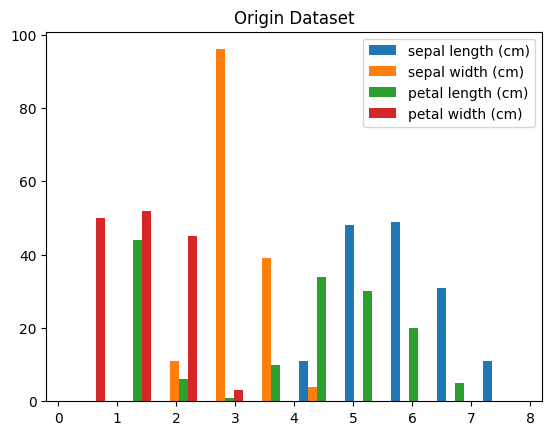

In [20]:
iris_df_standard = (iris_df - iris_df.mean())/iris_df.std()

plt.title('Origin Dataset')
plt.hist(iris_df)
plt.legend(iris_df.columns)

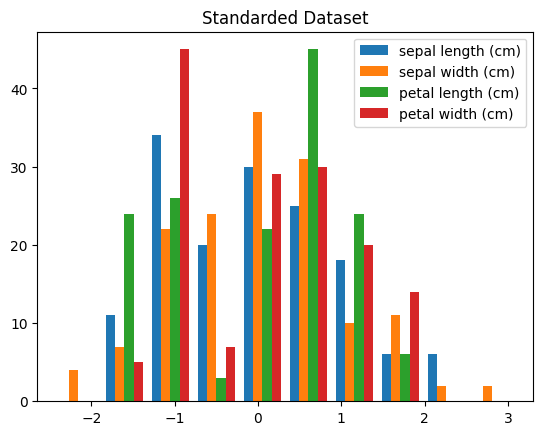

In [23]:
plt.title('Standarded Dataset')
plt.hist(iris_df_scaled)
plt.legend(iris_df_scaled.columns)
# 모든 컬럼의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환

# MinMax Scaler
- 데이터 값을 0과 1사이의 범위값으로 변환
- 데이터 분포가 가우시안 분포가 아닌 경우 Min, Max Scale 적용
- 분류보다 회귀에 유용

In [24]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


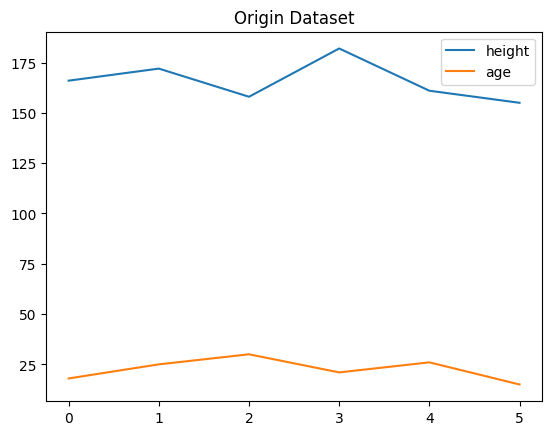

In [25]:
df = pd.DataFrame([[166, 18],[172, 25],[158, 30], [182, 21],  [161, 26],  [155, 15]])
df.columns = ['height', 'age']
df_new = (df - df.min())/(df.max() - df.min())
# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

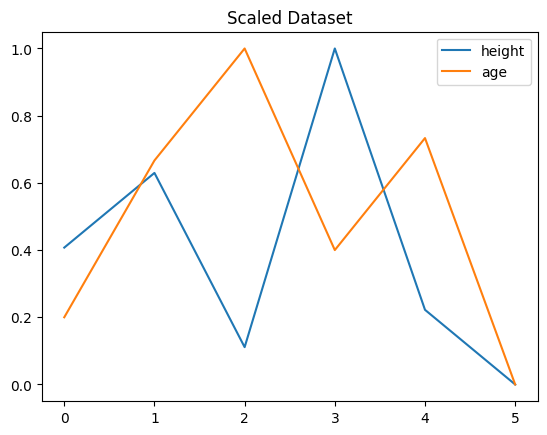

In [26]:
plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)
# 모든 피처에 0과 1사이의 값으로 변환되는 스케일링 적용

## MaxAbsScaler()
- 각 특성의 절대값이 0과 1사이가 되도록 스케일링
- 모든 값이 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler과 동일
- 이상치에 매우 민감

In [27]:
from sklearn.preprocessing import MaxAbsScaler

# 변형 객체 생성
maxabs_scaler = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxabs_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = maxabs_scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

# 테스트 데이터의 스케일링
#X_test_scaled = maxabs_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = maxabs_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)    0.544304
sepal width (cm)     0.454545
petal length (cm)    0.144928
petal width (cm)     0.040000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


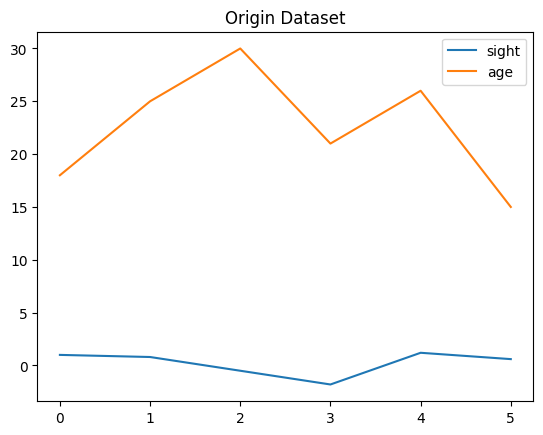

In [28]:
df = pd.DataFrame([[1.0, 18],   [0.8, 25],  [-0.5, 30],  [-1.8, 21], [1.2, 26], [0.6, 15]])
df.columns = ['sight', 'age']
df_new = df/df.abs().max()

# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

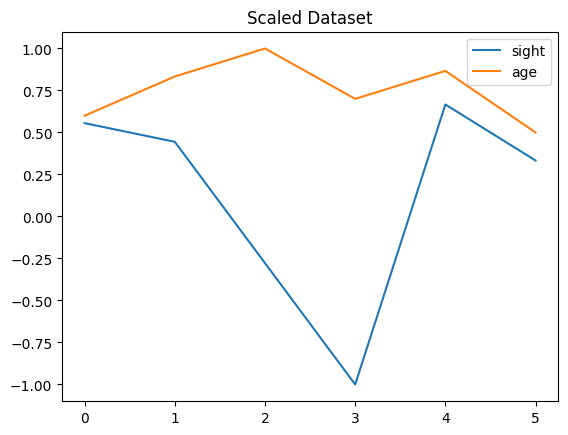

In [29]:
plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

## RobustScaler
- 평균과 분산 대신에 중간값과 사분위값을 사용
- 중간 값은 정렬시 중간에 있는 값을 의미
- 사분위값은 1/4, 3/4에 위치한 값
- 이상치 영향을 최소화 할 수 있다.

In [30]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = robust_scaler.transform(iris_df)

# 테스트 데이터의 스케일링
#X_test_scaled = robust_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = robust_scaler.inverse_transform(X_train_scaled)


#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


## Normalizer()
- 앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행
- 그러나 Normalizer의 경우 각 샘플(행) 마다 적용되는 방식
- 한 행의 모든 특성들 사이의 유클리드 거리가 1이 되도록 스케일링
- 일반적인 데이터 전처리의 상황에서 적용되는 것이 아니라
- 모델(특히 딥러닝) 내 학습 벡터에 적용되며
- 특히나 피쳐들이 다른 단위(키,나이,소득 등)라면 더더욱 사용하지 않습니다.

In [31]:
from sklearn.preprocessing import Normalizer

# 변형 객체 생성
normal_scaler = Normalizer()

# 훈련데이터의 모수 분포 저장
normal_scaler.fit(iris_df)

# 훈련 데이터 스케일링
X_train_scaled = normal_scaler.transform(iris_df)
#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())
# 테스트 데이터의 스케일링
#X_test_scaled = normal_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = normal_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64
